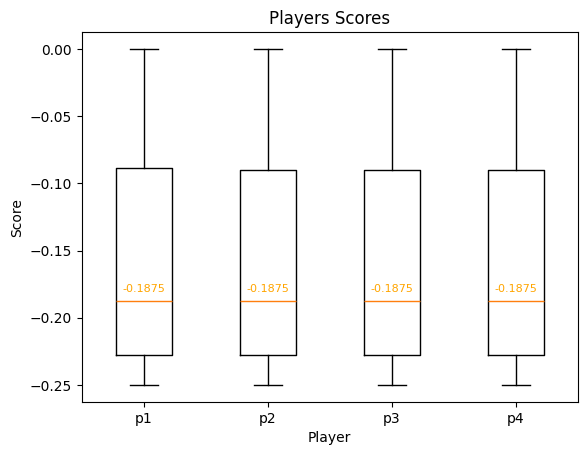

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
import pandas as pd

filename = "PerfectInformationPlayer-4-0.01-0.05"
predictions = pd.read_csv(f'../results/{filename}-predictions.csv')
scores = pd.read_csv(f'../results/{filename}-scores.csv')

players = scores.columns[1:-1]
avgs = [statistics.mean(scores[player].to_list()) for player in players]
sds = [statistics.stdev(scores[player].to_list()) for player in players]
column_values = [scores[player].tolist() for player in players]

fig, ax = plt.subplots()
boxplot = ax.boxplot(column_values, tick_labels=players.to_list(), notch=False)

for i, line in enumerate(boxplot['medians']):
    median_value = line.get_ydata()[0]
    x = line.get_xdata().mean()
    ax.annotate(f'{median_value:.4f}', xy=(x, median_value), xytext=(0, 5), fontsize=8,
                textcoords='offset points', ha='center', va='bottom', color='orange')

ax.set_xlabel('Player')
ax.set_ylabel('Score')
ax.set_title('Players Scores')
plt.show()
